In [1]:
import os
import pandas as pd
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
from bs4 import BeautifulSoup
from datetime import datetime

In [2]:
pd.set_option('display.max_rows', 100)

In [3]:
def scrape_currency(source='CNY', target='USD'):
    current_day = datetime.now().day
    current_month = datetime.now().month
    current_year = datetime.now().year
    
    url = f'https://fxtop.com/en/historical-exchange-rates.php?MA=1&YA=0&C1={source}&C2={target}&A=1&DD1=01&MM1=01&YYYY1=1989&DD2={current_day:02d}&MM2={current_month:02d}&YYYY2={current_year}&LARGE=1&LANG=en&MM1Y=0&PRINT=1&CJ=0&TR=O'
    print(url)
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    df = pd.read_html(soup.find_all('table')[2].prettify())[0]
    assert len(df.columns) == 5
    df.columns = df.iloc[0]
    df = df[1:]
    return df

In [4]:
# what to do?
df = scrape_currency(target='TRY')
df2 = scrape_currency(target='TRL')
df2.columns = df.columns
pd.concat([df, df2], ignore_index=True).drop_duplicates('Month', keep='first').reset_index(drop=True).iloc[280:300]

https://fxtop.com/en/historical-exchange-rates.php?MA=1&YA=0&C1=CNY&C2=TRY&A=1&DD1=01&MM1=01&YYYY1=1989&DD2=23&MM2=06&YYYY2=2023&LARGE=1&LANG=en&MM1Y=0&PRINT=1&CJ=0&TR=O
https://fxtop.com/en/historical-exchange-rates.php?MA=1&YA=0&C1=CNY&C2=TRL&A=1&DD1=01&MM1=01&YYYY1=1989&DD2=23&MM2=06&YYYY2=2023&LARGE=1&LANG=en&MM1Y=0&PRINT=1&CJ=0&TR=O


,Month,Average CNY/TRY=,Min CNY/TRY=,Max CNY/TRY=,Nb of working days
280,2/2000,0.068114,0.067523,0.069303,21
281,1/2000,0.065894,0.064682,0.067584,21
282,12/1999,0.064059,0.062545,0.065556,23
283,11/1999,0.060339,0.058288,0.062519,22
284,10/1999,0.056822,0.055809,0.058162,21
285,9/1999,0.055119,0.053760,0.056126,22
286,8/1999,0.052946,0.051924,0.054096,22
287,7/1999,0.051794,0.051107,0.052421,22
288,6/1999,0.057206,0.057206,0.057206,1
289,5/1999,55595.465881,54711.389484,56506.149105,21


In [5]:
save_dir = './data/historical_currency'
os.makedirs(save_dir, exist_ok=True)

In [6]:
curr_list = {'Canada': 'CAD', 'Chile': 'CLP', 'Mexico': 'MXN', 'Chinese Taipei': 'TWD', 'Hong Kong SAR': 'HKD', 'Japan': 'JPY', 'Korea (ROK)': 'KRW', 'Macao, China': 'MOP', 'Maldives': 'MVR', 'Cambodia': 'KHR',
             'Indonesia': 'IDR', 'Singapore': 'SGD', 'New Zealand': 'NZD', 'USA': 'USD', 'Thailand': 'THB', 'Turkey': 'TRY', 'Australia': 'AUD', 'Hawaii': 'USD', 'Austria': 'EUR', 'Czech': 'CZK'}

In [7]:
for name, code in curr_list.items():
    # print('scraping', code)
    df = scrape_currency(target=code)
    df.to_csv(os.path.join(save_dir, f'{name}.csv'), index=False)

https://fxtop.com/en/historical-exchange-rates.php?MA=1&YA=0&C1=CNY&C2=CAD&A=1&DD1=01&MM1=01&YYYY1=1989&DD2=23&MM2=06&YYYY2=2023&LARGE=1&LANG=en&MM1Y=0&PRINT=1&CJ=0&TR=O
https://fxtop.com/en/historical-exchange-rates.php?MA=1&YA=0&C1=CNY&C2=CLP&A=1&DD1=01&MM1=01&YYYY1=1989&DD2=23&MM2=06&YYYY2=2023&LARGE=1&LANG=en&MM1Y=0&PRINT=1&CJ=0&TR=O
https://fxtop.com/en/historical-exchange-rates.php?MA=1&YA=0&C1=CNY&C2=MXN&A=1&DD1=01&MM1=01&YYYY1=1989&DD2=23&MM2=06&YYYY2=2023&LARGE=1&LANG=en&MM1Y=0&PRINT=1&CJ=0&TR=O
https://fxtop.com/en/historical-exchange-rates.php?MA=1&YA=0&C1=CNY&C2=TWD&A=1&DD1=01&MM1=01&YYYY1=1989&DD2=23&MM2=06&YYYY2=2023&LARGE=1&LANG=en&MM1Y=0&PRINT=1&CJ=0&TR=O
https://fxtop.com/en/historical-exchange-rates.php?MA=1&YA=0&C1=CNY&C2=HKD&A=1&DD1=01&MM1=01&YYYY1=1989&DD2=23&MM2=06&YYYY2=2023&LARGE=1&LANG=en&MM1Y=0&PRINT=1&CJ=0&TR=O
https://fxtop.com/en/historical-exchange-rates.php?MA=1&YA=0&C1=CNY&C2=JPY&A=1&DD1=01&MM1=01&YYYY1=1989&DD2=23&MM2=06&YYYY2=2023&LARGE=1&LANG=en&MM1Y=

In [8]:
df.set_index('Month').iloc[:, 0]

Month
6/2023    3.069049
5/2023    3.106137
4/2023    3.103700
3/2023    3.209041
2/2023    3.237499
            ...   
5/1993    5.056321
4/1993    5.049275
3/1993    5.212909
2/1993    5.153492
1/1993    5.040608
Name: Average CNY/CZK=, Length: 366, dtype: object

In [10]:
final = []
for country in os.listdir(save_dir):
    if country.endswith('.csv'):
        temp = pd.read_csv(os.path.join(save_dir, country))
        country = country[:-4]
        temp['Date'] = pd.to_datetime(temp['Month'], format='%m/%Y').dt.normalize()
        temp = temp.set_index('Date').iloc[:, 1]
        temp.name = country
        final.append(temp)
    
final_df = pd.concat(final, axis=1)
# final_df.index = pd.to_datetime(final_df.index, format='%m/%Y').normalize()

In [11]:
final_df

,Japan,Korea (ROK),Chile,Maldives,Cambodia,Singapore,USA,Chinese Taipei,Thailand,Indonesia,Turkey,"Macao, China",Australia,New Zealand,Czech,Hawaii,Mexico,Hong Kong SAR,Canada,Austria
Date,,,,,,,,,,,,,,,,,,,,
1989-01-01,34.042108,183.685626,73.320847,2.483129,NaN,0.520095,0.267982,7.465791,6.784561,486.159251,NaN,2.206563,0.308221,0.429202,NaN,0.267982,0.676061,2.212141,0.319117,0.239173
1989-02-01,34.215966,182.296189,74.181798,2.512286,NaN,0.516736,0.267937,7.426573,6.802541,491.867848,NaN,2.232473,0.314071,0.434895,NaN,0.267937,0.683999,2.211971,0.318345,0.241942
1989-03-01,34.920539,181.056747,74.823001,2.534002,NaN,0.520110,0.267996,7.395488,6.830051,496.119389,NaN,2.251770,0.328089,0.435435,NaN,0.267996,0.689912,2.213151,0.319997,0.243606
1989-04-01,35.394164,179.609012,75.045202,2.541527,NaN,0.522518,0.267996,7.238442,6.840328,497.592711,NaN,2.258457,0.333576,0.438143,NaN,0.267996,0.691960,2.208777,0.318466,0.244129
1989-05-01,36.901598,179.370299,77.957804,2.640167,NaN,0.524550,0.267731,6.921602,6.901245,516.904930,NaN,2.346110,0.347097,0.442048,NaN,0.267731,0.718816,2.199792,0.319163,0.253504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-01,19.438689,186.878528,116.908585,2.244339,596.799229,0.194719,0.146293,4.417316,4.981379,2216.256037,2.757634,1.182332,0.211810,0.232318,3.237499,0.146293,2.724427,1.147895,0.196597,0.136532
2023-03-01,19.376886,189.450462,117.133017,2.233066,588.500613,0.194490,0.145050,4.434035,5.001259,2217.384473,2.756970,1.172598,0.217245,0.233613,3.209041,0.145050,2.672514,1.138444,0.198476,0.135497
2023-04-01,19.363465,192.131411,116.772164,2.230176,590.931793,0.193342,0.145187,4.441709,4.967952,2160.276106,2.808473,1.173864,0.216946,0.233677,3.103700,0.145187,2.626835,1.139673,0.195781,0.132444


In [12]:
def plot_data(df, country=None, by_month=False):
    fig, ax = plt.subplots(figsize=(12, 6))
    if country is not None:
        if isinstance(country, str):
            country = [country]
        for c in country:
            assert c in df.columns
        df = df[country]
    else:
        country = df.columns
    df = df.loc[df.first_valid_index(): df.last_valid_index()]
    df = df.unstack().reset_index()
    df.columns = ['Country', 'Date', 'Rate']
    if by_month:
        df['Year'], df['Month'] = df['Date'].dt.year.astype(str), df['Date'].dt.month
        if len(country) == 1:
            sns.lineplot(data=df, x='Month', y='Rate', hue='Year', ax=ax)
        else:
            sns.lineplot(data=df, x='Month', y='Rate', hue='Country', style='Year', ax=ax)
    else:
        sns.lineplot(data=df, x='Date', y='Rate', hue='Country', ax=ax)
    
    plt.xticks(rotation=45, ha='right')
    # for plotting months
    # if not by_month:
    #     locator = mdates.MonthLocator(bymonth=[3,6,9,12])
    #     ax.xaxis.set_minor_locator(locator)
    #     ax.xaxis.set_minor_formatter(mdates.ConciseDateFormatter(locator))

    return df

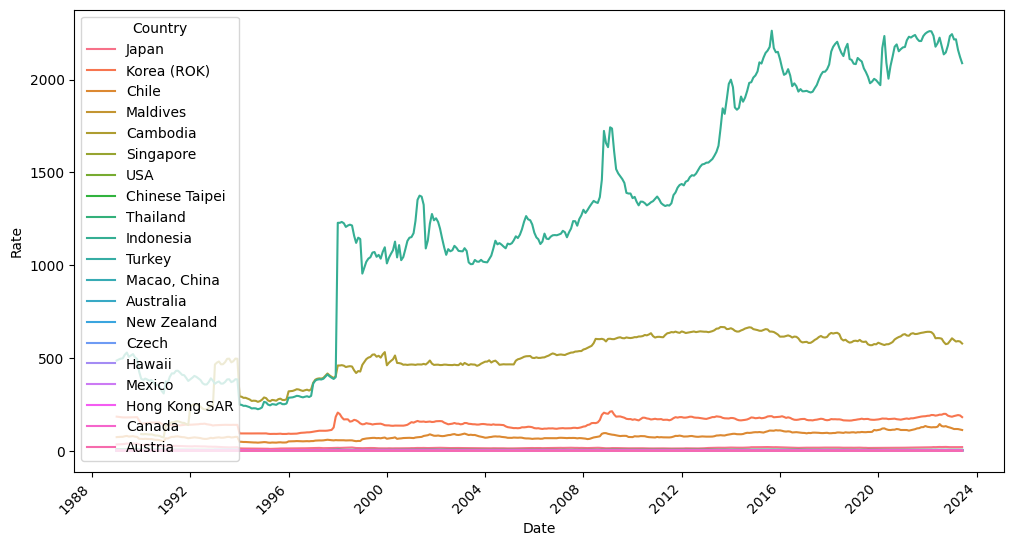

In [13]:
plot_df = plot_data(final_df)

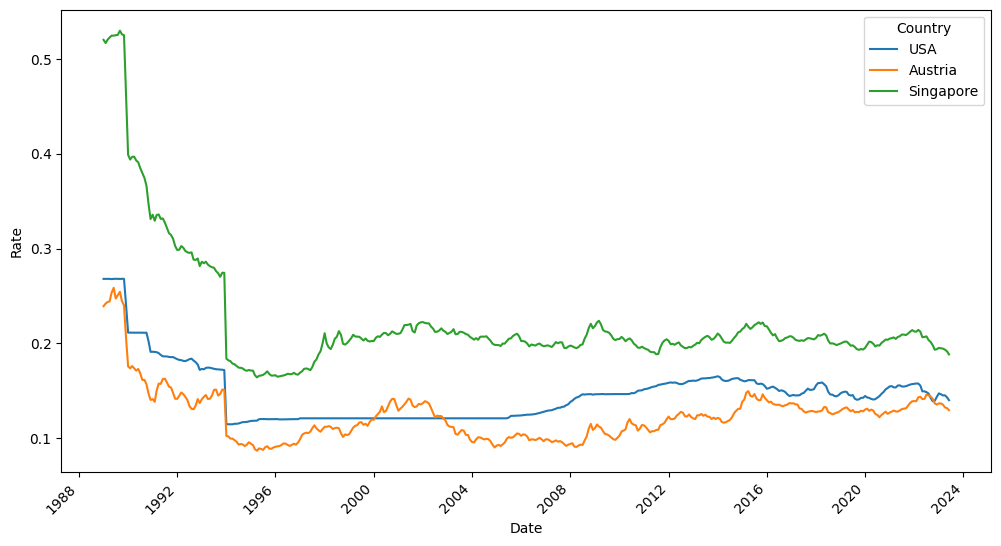

In [14]:
plot_df = plot_data(final_df, country=['USA', 'Austria', 'Singapore'])

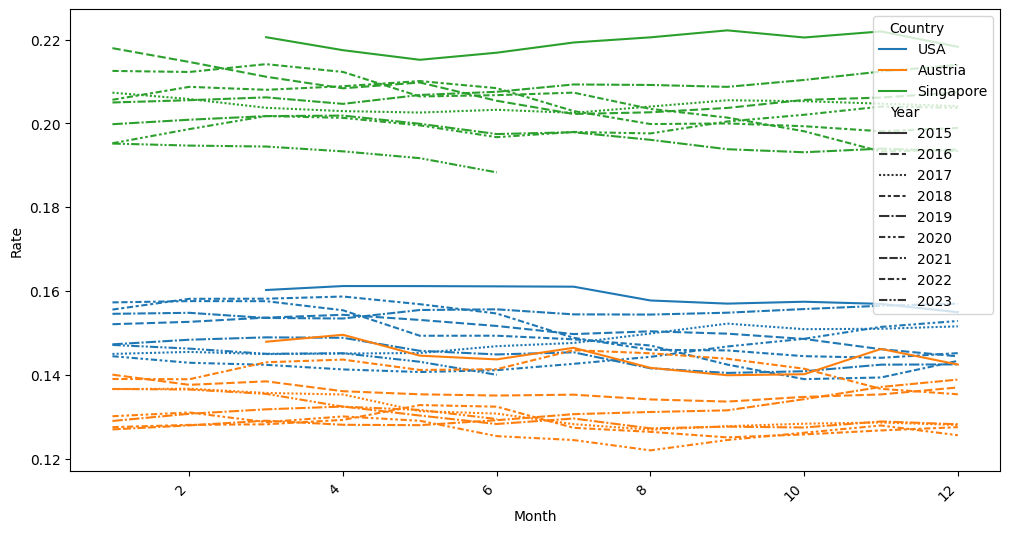

In [15]:
plot_df = plot_data(final_df.iloc[-100:], country=['USA', 'Austria', 'Singapore'], by_month=True)

In [17]:
final_df.to_csv('./data/Currency.csv')